In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [13]:
# Считываем данные
df_trades = pd.read_excel('Test_4.xlsx', sheet_name = 'HH_trades.csv')

In [21]:
# Считываем данные
df_incomes = pd.read_excel('Test_4.xlsx', sheet_name = 'HH_Incomes')

In [15]:
df_trades.head()

,_id,accountId,id,side,symbol,buyer,commission,commissionAsset,maker,orderId,positionSide,price,qty,quoteQty,realizedPnl,time
0,65895bb18205d2d83a7ffbeb,de91ba99878f3ec6ac95e6bb327ad02fc5695db2,29568715,BUY,BTCDOMUSDT,True,0.012601,USDT,False,1484071377,BOTH,2100-01-01 00:00:00,0.012,25.2012,0.0,2023-12-25T09:42:20.233Z
1,65895bb18205d2d83a7ffbec,de91ba99878f3ec6ac95e6bb327ad02fc5695db2,29568716,BUY,BTCDOMUSDT,True,0.011551,USDT,False,1484071377,BOTH,2100-01-01 00:00:00,0.011,23.1011,0.0,2023-12-25T09:42:20.233Z
2,65895bb18205d2d83a7ffbed,de91ba99878f3ec6ac95e6bb327ad02fc5695db2,29568717,BUY,BTCDOMUSDT,True,0.003150,USDT,False,1484071377,BOTH,2100-01-01 00:00:00,0.003,3003-06-01 00:00:00,0.0,2023-12-25T09:42:20.233Z
3,65895bb18205d2d83a7ffbee,de91ba99878f3ec6ac95e6bb327ad02fc5695db2,29568718,BUY,BTCDOMUSDT,True,0.490373,USDT,False,1484071377,BOTH,2100-01-01 00:00:00,0.467,980.7467,0.0,2023-12-25T09:42:20.233Z
4,65895bb18205d2d83a7ffbef,de91ba99878f3ec6ac95e6bb327ad02fc5695db2,29568719,BUY,BTCDOMUSDT,True,0.161715,USDT,False,1484071377,BOTH,2100-02-01 00:00:00,0.154,323.4308,0.0,2023-12-25T09:42:20.233Z


In [27]:
df_incomes.head()

,_id,accountId,asset,incomeType,symbol,tranId,income,info,time,tradeId
0,658935e88205d2d83a676055,de91ba99878f3ec6ac95e6bb327ad02fc5695db2,USDT,TRANSFER,NaN,150011656834,3000.000000,TRANSFER,2023-12-24T06:44:01.000Z,NaN
1,658935e88205d2d83a67605e,de91ba99878f3ec6ac95e6bb327ad02fc5695db2,USDT,TRANSFER,NaN,150121782799,-1000.000000,TRANSFER,2023-12-25T05:17:15.000Z,NaN
2,65894b478205d2d83a747597,de91ba99878f3ec6ac95e6bb327ad02fc5695db2,USDT,TRANSFER,NaN,150128726022,1000.000000,TRANSFER,2023-12-25T07:01:19.000Z,NaN
3,658967858205d2d83a8e6f85,de91ba99878f3ec6ac95e6bb327ad02fc5695db2,USDT,COMMISSION,BTCDOMUSDT,9248129568717,-0.003150,29568717,2023-12-25T09:42:20.000Z,29568717.0
4,658967858205d2d83a8e6f83,de91ba99878f3ec6ac95e6bb327ad02fc5695db2,USDT,COMMISSION,BTCDOMUSDT,9248129568715,-0.012601,29568715,2023-12-25T09:42:20.000Z,29568715.0


In [17]:
# Смортим типы данных
df_trades.dtypes

_id                 object
accountId           object
id                   int64
side                object
symbol              object
buyer                 bool
commission         float64
commissionAsset     object
maker                 bool
orderId              int64
positionSide        object
price               object
qty                float64
quoteQty            object
realizedPnl        float64
time                object
dtype: object

In [26]:
# Смортим типы данных
df_incomes.dtypes

_id                        object
accountId                  object
asset                      object
incomeType                 object
symbol                     object
tranId                      int64
income                    float64
info                       object
time          datetime64[ns, UTC]
tradeId                   float64
dtype: object

In [20]:
# Смотрим уникальные значения по ID счета
df_incomes.accountId.nunique()

1

### Задание 1 
Построение линейного графика роста реализованного баланса

In [25]:
# Преобразование time в datetime
df_incomes['time'] = pd.to_datetime(df_incomes['time'], unit='ms') 

In [28]:
# Округление  даты до дня
df_incomes['date'] = df_incomes['time'].dt.date


In [33]:
# Проверка на количество дат
df_incomes.date.nunique()

20

In [52]:
# Суммирование колонки income групируя по дням
daily_income = df_incomes.groupby('date')['income'].sum().reset_index(name='sum_income')

In [41]:
daily_income.head()

,date,sum_income
0,2023-12-24,3000.000000
1,2023-12-25,-1.116253
2,2023-12-26,-4.731519
3,2023-12-27,-0.982503
4,2023-12-28,-36.164797


In [53]:
# Расчет кумулятивной суммы по income
daily_income['cumulative_income'] = daily_income['sum_income'].cumsum()

In [54]:
daily_income.head()

,date,sum_income,cumulative_income
0,2023-12-24,3000.000000,3000.000000
1,2023-12-25,-1.116253,2998.883747
2,2023-12-26,-4.731519,2994.152228
3,2023-12-27,-0.982503,2993.169725
4,2023-12-28,-36.164797,2957.004927


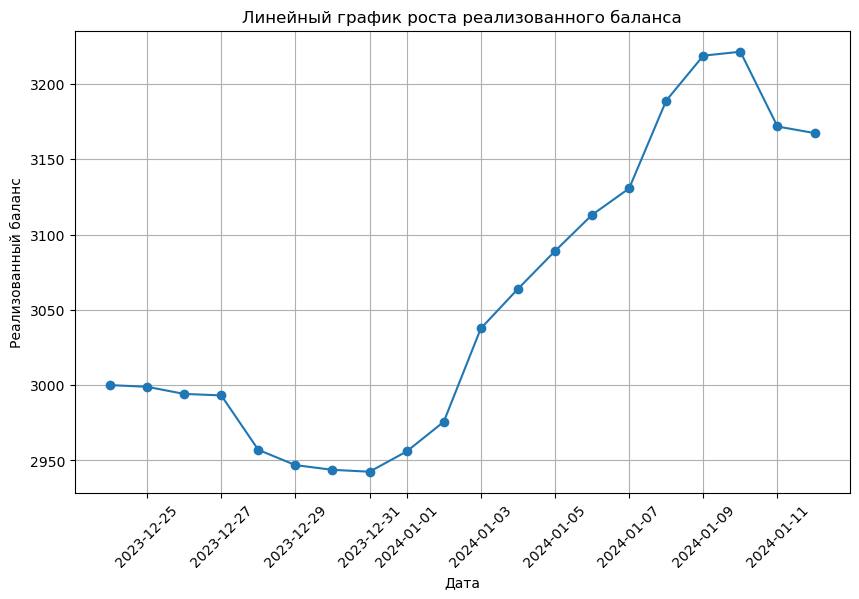

In [45]:
# Построение линейного графика
plt.figure(figsize=(10, 6))
plt.plot(daily_income['date'], daily_income['cumulative_income'], marker='o')
plt.title('Линейный график роста реализованного баланса')
plt.xlabel('Дата')
plt.ylabel('Реализованный баланс')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

## Вывод

1) График реализованного баланса. На этом графике мы увидели что с 24 декабря по 31 декабря происходит снижение баланса и с 1 января баланс начинает увеличиваться вплоть до 10 января. Причиной могут быть предновогодние события. 


### Задание 2
Построение линейного графика роста реализованной прибыли в % (формула сложного процента)

In [203]:
# Установка начального капитала, я посмотрел, что 3000 это был трансфер, поэтому будем считать это начальным капиталом
initial_capital = 3000

In [204]:
daily_income['capital'] = initial_capital

In [205]:
# Посчитаем прибыль, начиная со второй строки, так как первый элемент считается как начальный капитал и это 3000
for i in range(1, len(daily_income)):
    daily_income.loc[i, 'capital'] = daily_income.loc[i-1, 'capital'] * (1 + daily_income.loc[i, 'sum_income'] / daily_income.loc[i-1, 'capital'])
    

In [206]:
# Рассчитываем прирост капитала в процентах относительно начального
daily_income['cumulative_growth_pct'] = (daily_income['capital'] / initial_capital - 1) * 100

In [211]:
# Посмотрим на данные и отсортируем по убыванию % прибыли
daily_income[['date', 'sum_income', 'cumulative_income', 'capital', 'cumulative_growth_pct' ]]\
.sort_values('cumulative_growth_pct', ascending=False).head()

,date,sum_income,cumulative_income,capital,cumulative_growth_pct
17,2024-01-10,2.621735,3221.368878,3221.368878,7.378963
16,2024-01-09,29.821324,3218.747143,3218.747143,7.291571
15,2024-01-08,58.317384,3188.925819,3188.925819,6.297527
18,2024-01-11,-49.643813,3171.725066,3171.725066,5.724169
19,2024-01-12,-4.388693,3167.336373,3167.336373,5.577879


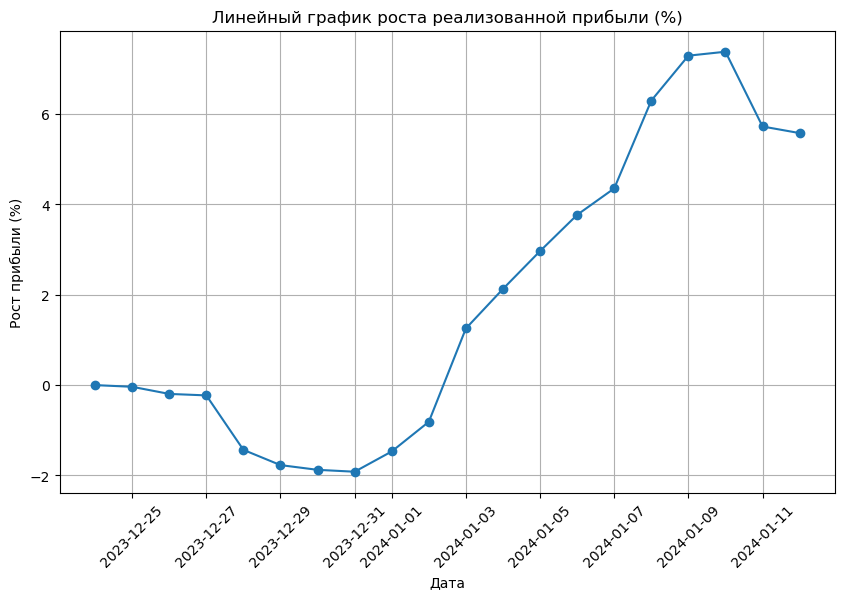

In [207]:
# Построение линейного графика
plt.figure(figsize=(10, 6))
plt.plot(daily_income['date'], daily_income['cumulative_growth_pct'], marker='o')
plt.title('Линейный график роста реализованной прибыли (%)')
plt.xlabel('Дата')
plt.ylabel('Рост прибыли (%)')
plt.grid(True)
plt.xticks(rotation=45)

plt.show()

## Вывод

2) График реализованной прибыли в % . На этом графике мы видим ту же динамику, что естесственно, и максимальная прибыль = 7.39 и была она 10 января.


### Задание 3
Построение линейного графика реализованной просадки

In [ ]:
# Посчитаем максимум капитала до текущего дня для каждого дня


In [76]:
daily_income['max_capital'] = daily_income['cumulative_income'].cummax()

In [79]:
daily_income.head()

,date,sum_income,cumulative_income,capital,cumulative_growth_pct,max_capital
0,2023-12-24,3000.000000,3000.000000,3100.000000,0.000000,3000.0
1,2023-12-25,-1.116253,2998.883747,3098.883747,-0.036008,3000.0
2,2023-12-26,-4.731519,2994.152228,3094.152228,-0.188638,3000.0
3,2023-12-27,-0.982503,2993.169725,3093.169725,-0.220331,3000.0
4,2023-12-28,-36.164797,2957.004927,3057.004927,-1.386938,3000.0


In [81]:
# Посчитаем просадку
daily_income['drawdown'] = (daily_income['max_capital'] - daily_income['cumulative_income']) / daily_income['max_capital'] * 100

In [215]:
# Посмотрим на данные и отсортируем по убыванию % просадки
daily_income[['date', 'sum_income', 'cumulative_income', 'capital', 'cumulative_growth_pct', 'drawdown']]\
.sort_values('drawdown', ascending=False).head()

,date,sum_income,cumulative_income,capital,cumulative_growth_pct,drawdown
7,2023-12-31,-1.258194,2942.486871,2942.486871,-1.917104,1.917104
6,2023-12-30,-3.129952,2943.745066,2943.745066,-1.875164,1.875164
5,2023-12-29,-10.129910,2946.875018,2946.875018,-1.770833,1.770833
19,2024-01-12,-4.388693,3167.336373,3167.336373,5.577879,1.677315
18,2024-01-11,-49.643813,3171.725066,3171.725066,5.724169,1.541078


In [212]:
# Преобразуем его в отрицательные значения для интуитивного понимания просадки
daily_income['negative_drawdown'] = daily_income['drawdown'] * -1

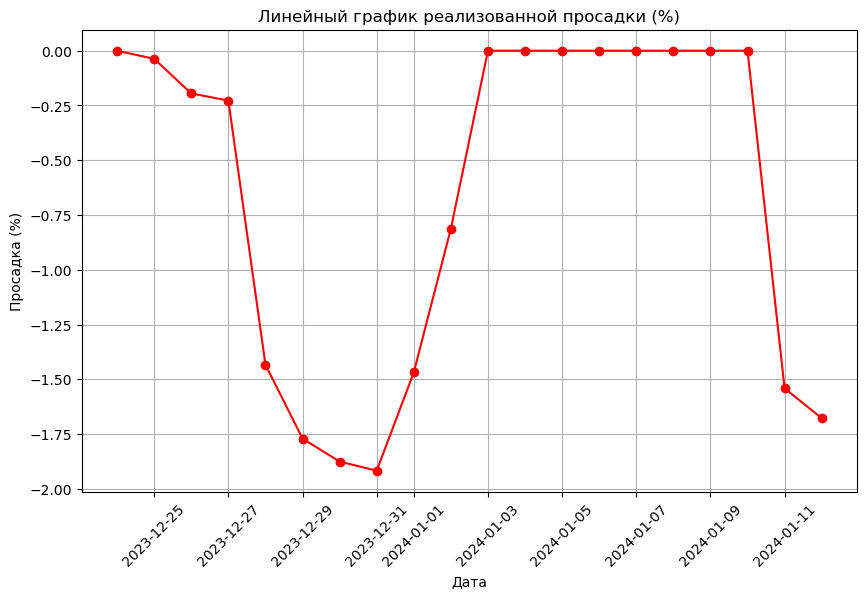

In [214]:
# Построение линейного графика просадки
plt.figure(figsize=(10, 6))
plt.plot(daily_income['date'], daily_income['negative_drawdown'], marker='o', color='red')
plt.title('Линейный график реализованной просадки (%)')
plt.xlabel('Дата')
plt.ylabel('Просадка (%)')
plt.grid(True)
plt.xticks(rotation=45)  
plt.show()

## Вывод

3) График реализованной просадки в %. На этом графике мы видим, что просадка происходит с 24 декабря по 31 декабря и с 10 января по 12.


### Задание 4
Построение линейного графика объема торгов

In [89]:
df_trades.head()

,_id,accountId,id,side,symbol,buyer,commission,commissionAsset,maker,orderId,positionSide,price,qty,quoteQty,realizedPnl,time
0,65895bb18205d2d83a7ffbeb,de91ba99878f3ec6ac95e6bb327ad02fc5695db2,29568715,BUY,BTCDOMUSDT,True,0.012601,USDT,False,1484071377,BOTH,2100-01-01 00:00:00,0.012,25.2012,0.0,2023-12-25T09:42:20.233Z
1,65895bb18205d2d83a7ffbec,de91ba99878f3ec6ac95e6bb327ad02fc5695db2,29568716,BUY,BTCDOMUSDT,True,0.011551,USDT,False,1484071377,BOTH,2100-01-01 00:00:00,0.011,23.1011,0.0,2023-12-25T09:42:20.233Z
2,65895bb18205d2d83a7ffbed,de91ba99878f3ec6ac95e6bb327ad02fc5695db2,29568717,BUY,BTCDOMUSDT,True,0.003150,USDT,False,1484071377,BOTH,2100-01-01 00:00:00,0.003,3003-06-01 00:00:00,0.0,2023-12-25T09:42:20.233Z
3,65895bb18205d2d83a7ffbee,de91ba99878f3ec6ac95e6bb327ad02fc5695db2,29568718,BUY,BTCDOMUSDT,True,0.490373,USDT,False,1484071377,BOTH,2100-01-01 00:00:00,0.467,980.7467,0.0,2023-12-25T09:42:20.233Z
4,65895bb18205d2d83a7ffbef,de91ba99878f3ec6ac95e6bb327ad02fc5695db2,29568719,BUY,BTCDOMUSDT,True,0.161715,USDT,False,1484071377,BOTH,2100-02-01 00:00:00,0.154,323.4308,0.0,2023-12-25T09:42:20.233Z


In [91]:
# Преобразование столбца 'time' в формат datetime
df_trades['time'] = pd.to_datetime(df_trades['time'])

In [92]:
# Выделение даты
df_trades['date'] = df_trades['time'].dt.date

In [93]:
daily_volume = df_trades.groupby('date')['qty'].sum().reset_index()

In [94]:
daily_volume.head()

,date,qty
0,2023-12-25,1.043
1,2023-12-26,0.714
2,2023-12-27,0.405
3,2023-12-28,0.957
4,2023-12-29,0.451


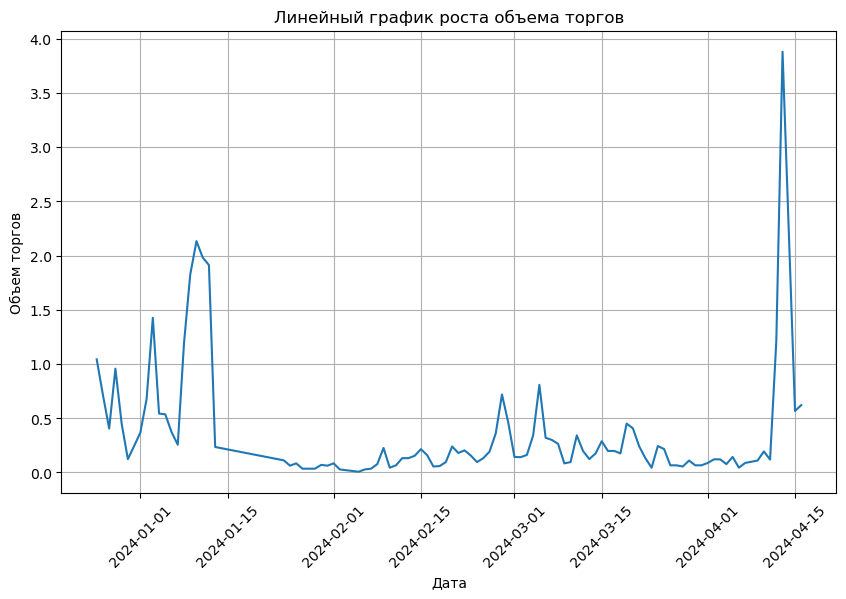

In [96]:
# Построение линейного графика объема торгов
plt.figure(figsize=(10, 6))
plt.plot(daily_volume['date'], daily_volume['qty'])
plt.title('Линейный график роста объема торгов')
plt.xlabel('Дата')
plt.ylabel('Объем торгов')
plt.grid(True)
plt.xticks(rotation=45)

plt.show()

In [223]:
# Изменение типа данных даты
daily_volume['date'] = pd.to_datetime(daily_volume['date'])
# Фильтрация данных по дате для обеих осей
filtered_data = daily_volume[daily_volume['date'] <= '2024-01-12']

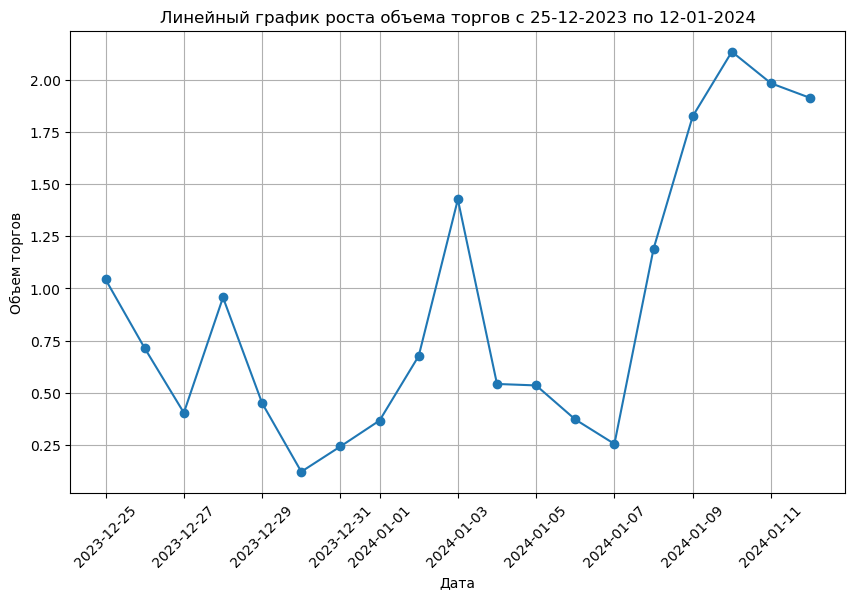

In [230]:
# Построение линейного графика объема торгов в даты трейдинга

plt.figure(figsize=(10, 6))
plt.plot(filtered_data['date'], filtered_data['qty'], marker='o')
plt.title('Линейный график роста объема торгов с 25-12-2023 по 12-01-2024')
plt.xlabel('Дата')
plt.ylabel('Объем торгов')
plt.grid(True)
plt.xticks(rotation=45)

plt.show()

In [104]:
# Посмотрим в какие дни были самые большие объемы торгов
daily_volume.sort_values('qty', ascending=False).head()

,date,qty
99,2024-04-13,3.879
16,2024-01-10,2.133
17,2024-01-11,1.982
18,2024-01-12,1.912
15,2024-01-09,1.824


## Вывод

4) График роста объема торгов. На этих графиках мы видим динамику объемов торгов по дням. График роста объема торгов показал значительные колебания объема, особенно в конце анализируемого периода.


### Задание 5
Вывести показатель максимальной просадки

In [ ]:
daily_income['drawdown_value'] = (daily_income['max_capital'] - daily_income['cumulative_income']) / daily_income['max_capital']

In [119]:
max_drawdown = daily_income[['date', 'drawdown']].loc[daily_income['drawdown'].idxmax()]

print(f"Дата максимальной просадки: {max_drawdown['date']}")
print(f"Максимальная просадка: {max_drawdown['drawdown']:.3}")

Дата максимальной просадки: 2023-12-31
Максимальная просадка: 1.92


### Задание 6
Вывести показатель максимального времени находжения в просадке в днях ( если получится в точном значении до сек)

In [134]:
daily_income.head(20)

,date,sum_income,cumulative_income,capital,cumulative_growth_pct,max_capital,drawdown,in_drawdown
0,2023-12-24,3000.000000,3000.000000,3100.000000,0.000000,3000.000000,0.000000,False
1,2023-12-25,-1.116253,2998.883747,3098.883747,-0.036008,3000.000000,0.037208,True
2,2023-12-26,-4.731519,2994.152228,3094.152228,-0.188638,3000.000000,0.194926,True
3,2023-12-27,-0.982503,2993.169725,3093.169725,-0.220331,3000.000000,0.227676,True
4,2023-12-28,-36.164797,2957.004927,3057.004927,-1.386938,3000.000000,1.433169,True
5,2023-12-29,-10.129910,2946.875018,3046.875018,-1.713709,3000.000000,1.770833,True
6,2023-12-30,-3.129952,2943.745066,3043.745066,-1.814675,3000.000000,1.875164,True
7,2023-12-31,-1.258194,2942.486871,3042.486871,-1.855262,3000.000000,1.917104,True
8,2024-01-01,13.460400,2955.947271,3055.947271,-1.421056,3000.000000,1.468424,True
9,2024-01-02,19.682584,2975.629855,3075.629855,-0.786134,3000.000000,0.812338,True


In [123]:
# Определяем, когда происходит просадка (когда капитал меньше максимума до этой даты)
daily_income['in_drawdown'] = daily_income['cumulative_income'] < daily_income['max_capital']

In [135]:
# Инициализация переменных
periods = [] # Создали список чтобы туда складывать даты макс. просадок
current_start = None

In [136]:
# Проходим по всем строкам DataFrame для определения начала и конца периодов просадки
for index, row in daily_income.iterrows():
    if row['in_drawdown']:
        if current_start is None:
            # Запоминаем дату начала просадки
            current_start = row['date']
    else:
        if current_start is not None:
            # Если просадка закончилась, запоминаем период
            current_end = daily_income.loc[index - 1, 'date']
            periods.append((current_start, current_end))
            current_start = None

# Если просадка продолжается до конца данных, также учитываем её
if current_start is not None:
    current_end = daily_income.iloc[-1]['date']
    periods.append((current_start, current_end))

In [150]:
# Теперь можем вычислить длительность каждого периода просадки
durations = [(end - start).days  for start, end in periods]

# Находим максимальную продолжительность просадки
max_drawdown_duration = max(durations, default=0) 
print(f"Полных суток нахождения в просадкке: {max_drawdown_duration}") 

Полных суток нахождения в просадкке: 8


In [141]:
periods

[(datetime.date(2023, 12, 25), datetime.date(2024, 1, 2)),
 (datetime.date(2024, 1, 11), datetime.date(2024, 1, 12))]

### Задание 7
Посчитать дневную волатильность получившегося счета и пополнения счета.

In [153]:
# Подсчет логарифмической доходности по состоянию счета

daily_income['log_capital'] = np.log(daily_income['cumulative_income']/daily_income['cumulative_income'].shift(1))

# Подсчет логарифмической доходности по приходу прибыли или убытка на счет 

daily_income['log_sum_income'] = np.log(daily_income['sum_income']/daily_income['sum_income'].shift(1))


D:\ProgramFiles\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [299]:
daily_income.head(20)

,date,sum_income,cumulative_income,capital,cumulative_growth_pct,max_capital,drawdown,in_drawdown,log_capital,log_sum_income,negative_drawdown
0,2023-12-24,3000.000000,3000.000000,3000.000000,0.000000,3000.000000,0.000000,False,NaN,NaN,-0.000000
1,2023-12-25,-1.116253,2998.883747,2998.883747,-0.037208,3000.000000,0.037208,True,-0.000372,NaN,-0.037208
2,2023-12-26,-4.731519,2994.152228,2994.152228,-0.194926,3000.000000,0.194926,True,-0.001579,1.444269,-0.194926
3,2023-12-27,-0.982503,2993.169725,2993.169725,-0.227676,3000.000000,0.227676,True,-0.000328,-1.571898,-0.227676
4,2023-12-28,-36.164797,2957.004927,2957.004927,-1.433169,3000.000000,1.433169,True,-0.012156,3.605738,-1.433169
5,2023-12-29,-10.129910,2946.875018,2946.875018,-1.770833,3000.000000,1.770833,True,-0.003432,-1.272594,-1.770833
6,2023-12-30,-3.129952,2943.745066,2943.745066,-1.875164,3000.000000,1.875164,True,-0.001063,-1.174475,-1.875164
7,2023-12-31,-1.258194,2942.486871,2942.486871,-1.917104,3000.000000,1.917104,True,-0.000428,-0.911340,-1.917104
8,2024-01-01,13.460400,2955.947271,2955.947271,-1.468424,3000.000000,1.468424,True,0.004564,NaN,-1.468424
9,2024-01-02,19.682584,2975.629855,2975.629855,-0.812338,3000.000000,0.812338,True,0.006637,0.379982,-0.812338


In [159]:
# Подсчет волатильности, подсчетом стандартного отклонения
capital_volatility = daily_income['log_capital'].std()
income_volatility = daily_income['log_sum_income'].std()
print(f"Значение дневной волатильности доходности по состоянию счета: {capital_volatility:.2}")
print(f"Значение дневной волатильности доходности по приходу прибыли или убытка на счет: {income_volatility:.3}")

Значение дневной волатильности доходности по состоянию счета: 0.0088
Значение дневной волатильности доходности по приходу прибыли или убытка на счет: 1.56


### Задание 8
Посчитать Фандинг ( полученный, уплаченый, всего)

In [160]:
df_incomes.head()

,_id,accountId,asset,incomeType,symbol,tranId,income,info,time,tradeId,date
0,658935e88205d2d83a676055,de91ba99878f3ec6ac95e6bb327ad02fc5695db2,USDT,TRANSFER,NaN,150011656834,3000.000000,TRANSFER,2023-12-24 06:44:01+00:00,NaN,2023-12-24
1,658935e88205d2d83a67605e,de91ba99878f3ec6ac95e6bb327ad02fc5695db2,USDT,TRANSFER,NaN,150121782799,-1000.000000,TRANSFER,2023-12-25 05:17:15+00:00,NaN,2023-12-25
2,65894b478205d2d83a747597,de91ba99878f3ec6ac95e6bb327ad02fc5695db2,USDT,TRANSFER,NaN,150128726022,1000.000000,TRANSFER,2023-12-25 07:01:19+00:00,NaN,2023-12-25
3,658967858205d2d83a8e6f85,de91ba99878f3ec6ac95e6bb327ad02fc5695db2,USDT,COMMISSION,BTCDOMUSDT,9248129568717,-0.003150,29568717,2023-12-25 09:42:20+00:00,29568717.0,2023-12-25
4,658967858205d2d83a8e6f83,de91ba99878f3ec6ac95e6bb327ad02fc5695db2,USDT,COMMISSION,BTCDOMUSDT,9248129568715,-0.012601,29568715,2023-12-25 09:42:20+00:00,29568715.0,2023-12-25


In [161]:
# Найдем тип пополнения
df_incomes.incomeType.unique()

array(['TRANSFER', 'COMMISSION', 'REALIZED_PNL', 'FUNDING_FEE'],
      dtype=object)

In [165]:
# Отфильтруем датафрейм по FUNDING_FEE и оставим нужные колонки
funding_df = df_incomes[['income', 'incomeType', 'asset', 'time', 'date']].loc[df_incomes.incomeType == 'FUNDING_FEE']

In [167]:
funding_df.head()

,income,incomeType,asset,time,date
16,-0.049650,FUNDING_FEE,USDT,2023-12-25 16:00:00+00:00,2023-12-25
20,-1.468658,FUNDING_FEE,USDT,2023-12-25 16:00:02+00:00,2023-12-25
24,-0.056766,FUNDING_FEE,USDT,2023-12-26 00:00:00+00:00,2023-12-26
25,-0.997289,FUNDING_FEE,USDT,2023-12-26 00:00:02+00:00,2023-12-26
38,-0.091509,FUNDING_FEE,USDT,2023-12-26 08:00:00+00:00,2023-12-26


In [170]:
# Создадим колонки funding_received и funding_paid
funding_df['funding_received'] = funding_df['income'].apply(lambda x: x if x > 0 else 0)
funding_df['funding_paid'] = funding_df['income'].apply(lambda x: x if x < 0 else 0)

In [175]:
funding_df.head()

,income,incomeType,asset,time,date,funding_received,funding_paid
16,-0.049650,FUNDING_FEE,USDT,2023-12-25 16:00:00+00:00,2023-12-25,0.0,-0.049650
20,-1.468658,FUNDING_FEE,USDT,2023-12-25 16:00:02+00:00,2023-12-25,0.0,-1.468658
24,-0.056766,FUNDING_FEE,USDT,2023-12-26 00:00:00+00:00,2023-12-26,0.0,-0.056766
25,-0.997289,FUNDING_FEE,USDT,2023-12-26 00:00:02+00:00,2023-12-26,0.0,-0.997289
38,-0.091509,FUNDING_FEE,USDT,2023-12-26 08:00:00+00:00,2023-12-26,0.0,-0.091509


In [176]:
# Посчитаем фандинги
funding_received = funding_df['funding_received'].sum()
funding_paid = funding_df['funding_paid'].sum()
net_funding =  funding_received + funding_paid


In [179]:
print(f"Полученный фандинг: {funding_received:.3}")
print(f"Уплаченный фандинг: {funding_paid:.4}")
print(f"Общий фандинг: {net_funding:.4}")

Полученный фандинг: 2.84
Уплаченный фандинг: -26.75
Общий фандинг: -23.91


### Задание 9
Посчитать NET  Profit инвестора при коммисии за успех 35% взымаемой каждое 1 число месяца.

In [182]:
# Найдем тип пополнения и их количество
df_incomes.incomeType.value_counts()

COMMISSION      598
REALIZED_PNL    293
FUNDING_FEE     105
TRANSFER          3
Name: incomeType, dtype: int64

In [183]:
# При подсчете чистой прибыли не будем учитывать трансфер
df_net_profit = df_incomes.loc[df_incomes['incomeType'] != 'TRANSFER']

In [193]:
df_net_profit['date'] = pd.to_datetime(df_net_profit['date'])

C:\Users\domodedovo\AppData\Local\Temp\ipykernel_18700\691096843.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_net_profit['date'] = pd.to_datetime(df_net_profit['date'])


In [194]:
# Фильтрация данных по периодам
period1 = df_net_profit.loc[(df_net_profit['date'] >= '2023-12-24') & (df_net_profit['date'] <= '2023-12-31')]
period2 = df_net_profit.loc[(df_net_profit['date'] >= '2024-01-01') & (df_net_profit['date'] <= '2024-01-12')]

In [197]:
# Расчет валовой прибыли за каждый период
gross_profit_period1 = period1['income'].sum()
gross_profit_period2 = period2['income'].sum()
print(f"Валовая прибыль за период 1 (24 декабря - 31 декабря): {gross_profit_period1:.4}")
print(f"Валовая прибыль за период 2 (1 января - 12 января): {gross_profit_period2:.4}")

Валовая прибыль за период 1 (24 декабря - 31 декабря): -57.51
Валовая прибыль за период 2 (1 января - 12 января): 224.8


In [226]:
# Так как за декабрь валовая прибыль неуспешна, тогда 35% за первый период не взимается 1 января 


# Расчет чистой прибыли за оба периода
net_profit_period1 = gross_profit_period1
net_profit_period2 = gross_profit_period2  # Во втором периоде также комиссия не взимается 

# Общая чистая прибыль
total_net_profit = net_profit_period1 + net_profit_period2

# Вывод результатов

print(f"Чистая прибыль за период 1 (24 декабря - 31 декабря) : {net_profit_period1:.4}")
print(f"Чистая прибыль за период 2 (1 января - 12 января): {net_profit_period2:.4}")
print(f"Общая чистая прибыль: {total_net_profit:.5}")

Чистая прибыль за период 1 (24 декабря - 31 декабря) : -57.51
Чистая прибыль за период 2 (1 января - 12 января): 224.8
Общая чистая прибыль: 167.34


### Дополнительные коэффиценты и графики
### Задание 10
Коэффициент Шарпа

## Вывод
Наши данные находятся в диапозоне с 24 декабря 2023 года по 12 января 2024 года.
Мы посчитали и визуализировали следующее:
1) График реализованного баланса. На этом графике мы увидели 

In [231]:
daily_income.head()

,date,sum_income,cumulative_income,capital,cumulative_growth_pct,max_capital,drawdown,in_drawdown,log_capital,log_sum_income,negative_drawdown
0,2023-12-24,3000.000000,3000.000000,3000.000000,0.000000,3000.0,0.000000,False,NaN,NaN,-0.000000
1,2023-12-25,-1.116253,2998.883747,2998.883747,-0.037208,3000.0,0.037208,True,-0.000372,NaN,-0.037208
2,2023-12-26,-4.731519,2994.152228,2994.152228,-0.194926,3000.0,0.194926,True,-0.001579,1.444269,-0.194926
3,2023-12-27,-0.982503,2993.169725,2993.169725,-0.227676,3000.0,0.227676,True,-0.000328,-1.571898,-0.227676
4,2023-12-28,-36.164797,2957.004927,2957.004927,-1.433169,3000.0,1.433169,True,-0.012156,3.605738,-1.433169


In [237]:
# Среднедневная доходность
mean_capital = daily_income['log_capital'].mean()

# Стандартное отклонение дневной доходности уже посчитан ранее - capital_volatility

# Безрисковая ставка (предположим 0%)
risk_free_rate = 0

# Коэффициент Шарпа (на дневной основе)
sharpe_ratio = (mean_capital - risk_free_rate) / capital_volatility
print(f" Коэффициент Шарпа (на дневной основе) : {sharpe_ratio:.2}")

 Коэффициент Шарпа (на дневной основе) : 0.32


### Задание 11
Гистограмма доходности

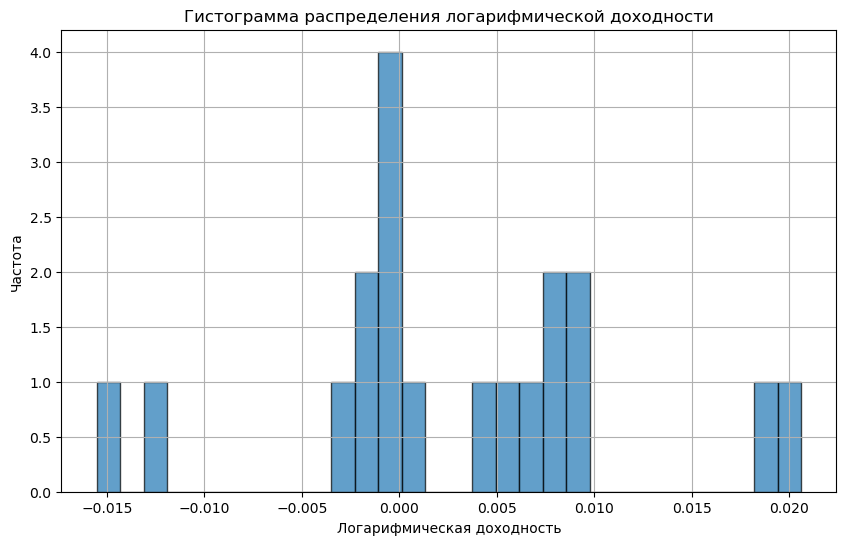

In [238]:
# Удаляем возможные NaN значения, которые могут появиться после расчета логарифмов
log_dropna = daily_income['log_capital'].dropna()

# Построение гистограммы распределения доходности
plt.figure(figsize=(10, 6))
plt.hist(log_dropna, bins=30, edgecolor='black', alpha=0.7)
plt.title('Гистограмма распределения логарифмической доходности')
plt.xlabel('Логарифмическая доходность')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

## Вывод:
На гистограмме:
- значение околонулевое 
- примерно симметричное
- на взгляд все-таки кажется что положительных значений больше, что на самом деле так.

### Задание 12
Анализ корреляции между объемом торгов и доходностью

In [ ]:
filtered_data

In [271]:
# Посчитаем корреляцию
correlation = round(filtered_data['qty'].corr(daily_income['log_capital']), 3)
correlation

0.079

In [265]:
daily_income['date'] = pd.to_datetime(daily_income['date'])

In [ ]:
df_net_profit['date'] = pd.to_datetime(df_net_profit['date'])

In [266]:
# Подготовка данных для проведения корреляции 
# Объеденяем датафреймы для синхронизации дат
merged_df = pd.merge(filtered_data[['date', 'qty']], daily_income[['date', 'log_capital']], on='date')

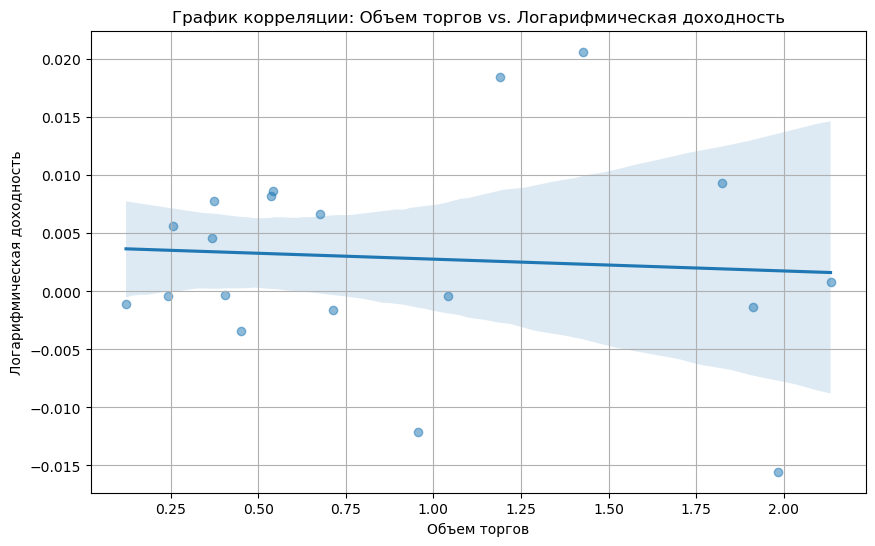

In [267]:
# Построение графика корреляции с линией тренда
plt.figure(figsize=(10, 6))
sns.regplot(x='qty', y='log_capital', data=merged_df, scatter_kws={'alpha':0.5})
plt.title('График корреляции: Объем торгов vs. Логарифмическая доходность')
plt.xlabel('Объем торгов')
plt.ylabel('Логарифмическая доходность')
plt.grid(True)
plt.show()

### Задание 13
Коэффициент Маркстейна, Calmar Ratio

In [290]:
# Рассчитаем доходность за период на основе cumulative_income

initial_income = daily_income['cumulative_income'].iloc[0]
final_income = daily_income['cumulative_income'].iloc[-1]
period_return = (final_income / initial_income) - 1

In [291]:
period_return

0.05577879102666672

In [292]:
# Экстраполируем доходность на год
days_in_period = (daily_income['date'].max() - daily_income['date'].min()).days + 1
annual_return = (1 + period_return) ** (365 / days_in_period) - 1

In [293]:
# Максимальная просадка 
max_drawdown = daily_income['drawdown'].max()

In [295]:
# Calmar Ratio
calmar_ratio = round(annual_return / max_drawdown, 2)
calmar_ratio

0.88

# Вывод
Наши данные находятся в диапозоне с 24 декабря 2023 года по 12 января 2024 года. 

Анализ этих данных содержит ключевые показатели и графики, которые дают хорошее представление о работе алгоритмической стратегии. 

Стратегия показала в общем положительный результат, что свидетельствует о ее потенциале. Однако первый период, к концу 2023 года  был убыточным, что может указывать на недостатки в адаптации к рыночным условиям и неучетом исторических данных предыдущих лет этого периода.

Коэффициент Шарпа (на дневной основе) =  0.32, что ниже 1, указывает на то, что стратегия, скорее всего, не компенсирует инвестору риск, связанный с этой стратегией. 

Calmar Ratio = 0.88 указывает на то, что стратегия имеет умеренное соотношение доходности и риска, с риском, который почти равен доходности. Это не плохой показатель, но он указывает на возможность улучшений, особенно в области управления рисками или оптимизации доходности. Если цель — создать более устойчивую стратегию, стоит стремиться к Calmar Ratio выше 1.

Мы посчитали и визуализировали следующее:
1) График реализованного баланса. На этом графике мы увидели что с 24 декабря по 31 декабря происходит снижение баланса и с 1 января баланс начинает увеличиваться вплоть до 10 января. Причиной могут быть предновогодние события. 

2) График реализованной прибыли в % . На этом графике мы видим ту же динамику, что естесственно, и максимальная прибыль = 7.39% и была она 10 января.

3) График реализованной просадки в %. На этом графике мы видим, что просадка происходит с 24 декабря по 31 декабря и с 10 января по 12.

4) График роста объема торгов. На этих графиках мы видим динамику объемов торгов по дням. График роста объема торгов показал значительные колебания объема, особенно в конце анализируемого периода.

5) Показатель максимальной просадки. Дата максимальной просадки: 2023-12-31 . Максимальная просадка: 1.92

6) Показатель максимального времени находжения в просадке в полных днях = 8

7) Значение дневной волатильности получившегося счета и пополнения счета. 

- Значение дневной волатильности доходности по состоянию счета: 0.0088 - довольно низкая, что означает, что  доходность относительно стабильно колеблется около среднего значения и что стратегия хорошо подходит для консервативных инвесторов и что может быть преимуществом в условиях неопределенности на рынке. Но также, такая стратегия ограничивает возможность получения более значительных прибылей.
- Значение дневной волатильности доходности по приходу прибыли или убытка на счет: 1.56

8) Фандинг ( полученный, уплаченый, всего)

- Полученный фандинг: 2.84
- Уплаченный фандинг: -26.75
- Общий фандинг: -23.91

Общий фандинг оказался отрицательным, что указывает на то, что стратегия платит больше за удержание позиций, чем получает. Это может негативно сказываться на общей доходности, особенно в долгосрочной перспективе. Возможно стоить оптимизировать стратегию для уменьшения затрат на фандинг.

9) NET Profit инвестора при коммисии за успех 35% взымаемой каждое 1 число месяца. Так как за декабрь валовая прибыль неуспешна, тогда 35% за первый период не взимается 1 января. Во втором периоде (1 января - 12 января) также комиссия не взимается, так как новый месяц еще не наступил.

- Чистая прибыль за период 1 (24 декабря - 31 декабря) : -57.51
- Чистая прибыль за период 2 (1 января - 12 января): 224.8
- Общая чистая прибыль: 167.34

10)  Коэффициент Шарпа (на дневной основе) =  0.32, что ниже 1, указывает на то, что стратегия, скорее всего, не компенсирует инвестору риск, связанный с этой стратегией.

11) На Гистограмме распределения логарифмической доходности можно увидеть:

- значение околонулевое 
- примерно симметричное
- на взгляд все-таки кажется что положительных значений больше, что на самом деле так.

В целом это подтверждает выводы, сделанные ранее по сбалансированной и консервативной стратегии.

12) Коэффициент корреляции 0.079 указывает на отсутствие значимой линейной зависимости между объемом торгов и логарифмической доходностью. График с почти горизонтальной линией тренда подтверждает это наблюдение. Широкий доверительный интервал вокруг линии тренда также может указывать на значительную неопределенность и вариативность в данных. Это все означает, что изменение объема торгов практически не связано с изменением логарифмической доходности.

13) Calmar Ratio = 0.88. Значение 0.88 указывает на то, что за каждый процент максимальной просадки стратегия приносит 0.88% годовой доходности. Это значит, что стратегия имеет доходность, сопоставимую с уровнем риска, но не значительно превышает его. Лучше стремиться к Calmar Ratio выше 1.